---

![ExposysDataLabs](logo.png)
<p style='text-align: center;'> EXPOSYS DATA LABS</p>
<h1 align="center">Customer Segmentation</h1> 
<h4 align='center'>using K-means clustering</h4>
<div style="text-align: right">created<br>
-- by Mayur R. Machhi<br>
-- for Exposys Data Labs</div>

---

### 1. Importing the libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

---

### 2. Importing the data from .csv file

In [2]:
#Loading the data in a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')

In [3]:
#Viewing pandas dataframe object
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---

### 3. Viewing and Describing the data

In [4]:
#Viewing Head and Tail of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#checking the sample size of data - how many samples are there in the dataset
len(data)

200

In [7]:
#checking the dimensions/shape of the dataset
data.shape

(200, 5)

In [8]:
#Viewing Column names
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Gender
Column number 3 is Age
Column number 4 is Annual Income (k$)
Column number 5 is Spending Score (1-100)


In [10]:
#view datatypes of each column in the dataset
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
#Further information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
#describing the data as basic statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# from sklearn.preprocessing import LabelEncoder
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = LabelEncoder() 
  
# # Encode labels in column 'species'. 
# data['Gender']= label_encoder.fit_transform(data['Gender']) 
  
# data

### 4. Checking the data for inconsistencies and further cleaning the data if needed.

In [14]:
#checking data for missing values
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [15]:
# checking summary of missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# the customer_id column has no relevence therefore deleting it would be better
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
#cleaning the data labels (Annual income and Spending Score)
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
# the annual income has inconsistent data as it shoulb be in 'Thousands'
data['Annual_Income'] = data['Annual_Income'] *  1000
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


#### NOTE : Data doesnt have any missing values so it is clean, and therefore no need for cleaning the data

### 5. Understanding and Visualizing Data

In [19]:
#Finding Corelations in the data and columns
corr = data.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


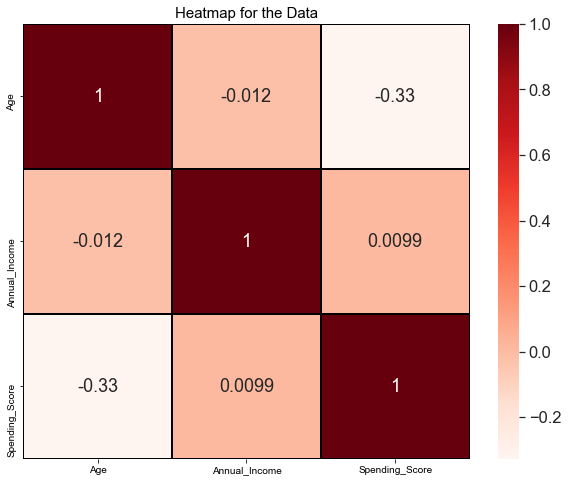

In [20]:
# Plotting the heatmap of correlation of all the columns of the dataset

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True,linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

#### 5.1. Gender Data Visualization

In [21]:
#First we take a look at the gender column of the dataset
data['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [22]:
# Data type of the column
data['Gender'].dtype

dtype('O')

In [23]:
# Finding the unique values in the column
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
# Counts of each type in the Gender Column
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

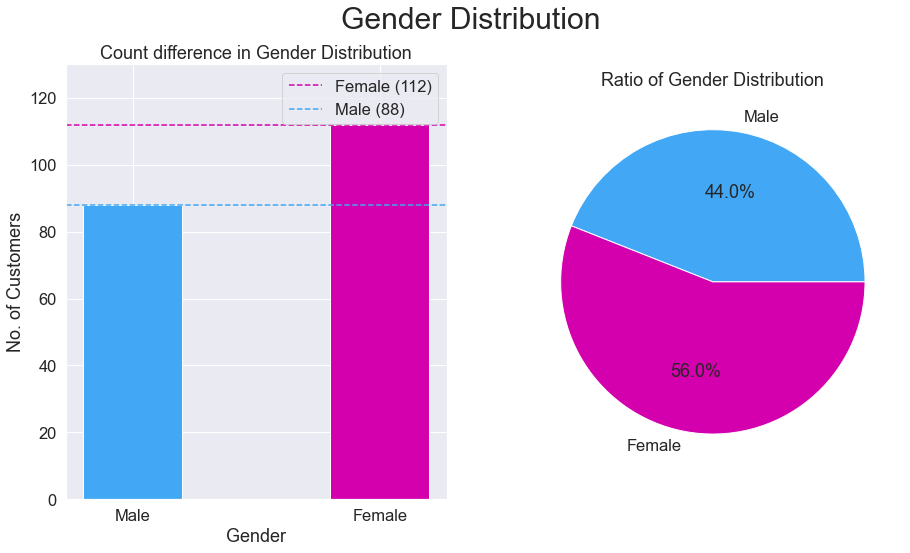

In [25]:
# Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### 5.2. Age Data Visualization

In [26]:
#First we take a look at the age column of the dataset
data['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [27]:
# Data type of the column
data['Age'].dtype

dtype('int64')

In [28]:
# Finding the unique values in the column
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [29]:
# Statistical Description of the Age column
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

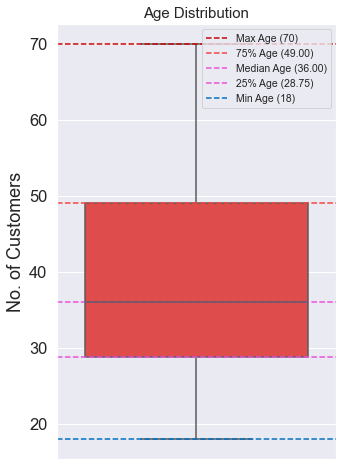

In [30]:
#Visualizing Statistical Description of the Age
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 15)
plt.show()

In [31]:
# Counts of first five max age in the Age Column
data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

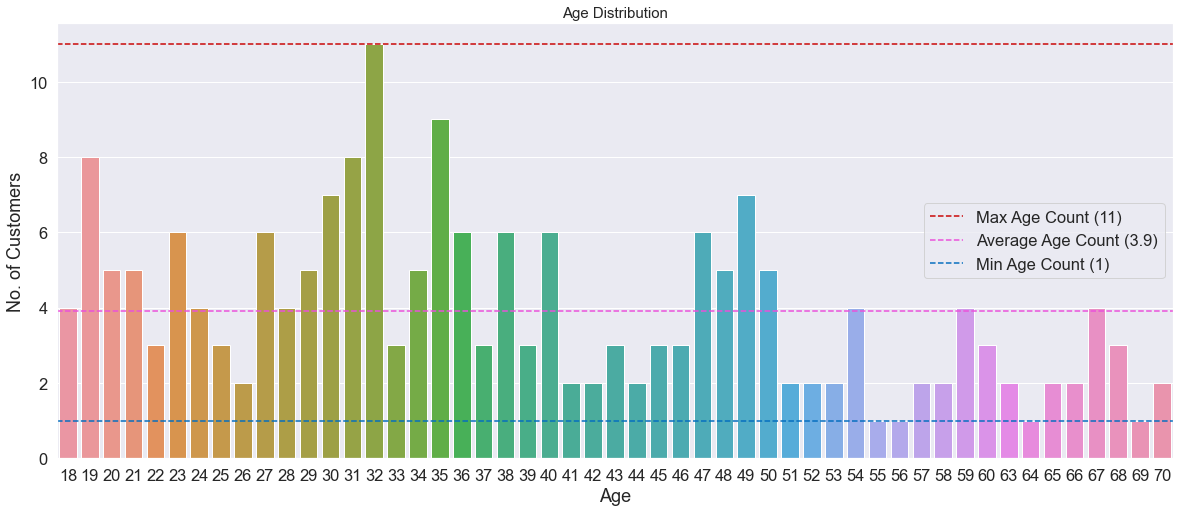

In [32]:
#Visualizing Age  Distribution
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'])
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 15)
plt.show()

In [33]:
# Gender wise Age Distribution

# Statistical Age Distribution of Male customers


data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [34]:
# Statistical Age Distribution of female customers
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

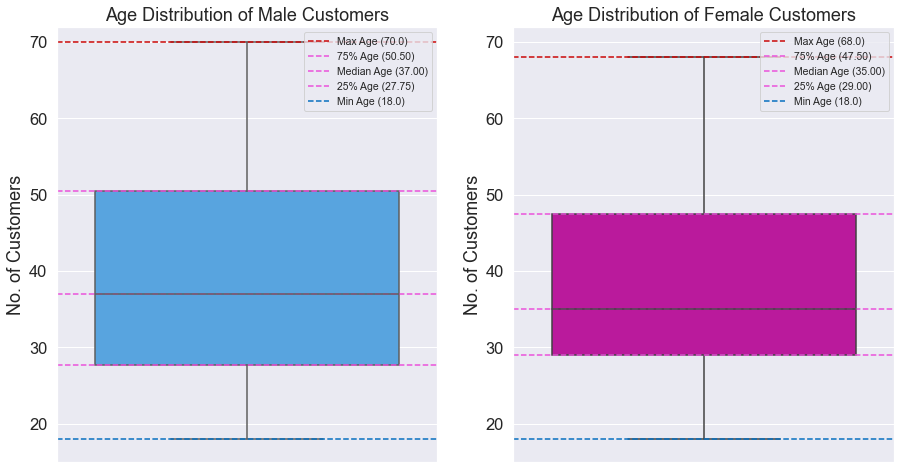

In [35]:
# Visualizing Gender wise Age Distribution of Male and Female customers
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

In [36]:
# Average Age of Male Customers
data[data['Gender']=='Male'].Age.mean()

39.80681818181818

In [37]:
# Counts of first five max age in the Male Customers
data[data['Gender']=='Male'].Age.value_counts().head()

19    6
32    5
48    5
59    4
40    3
Name: Age, dtype: int64

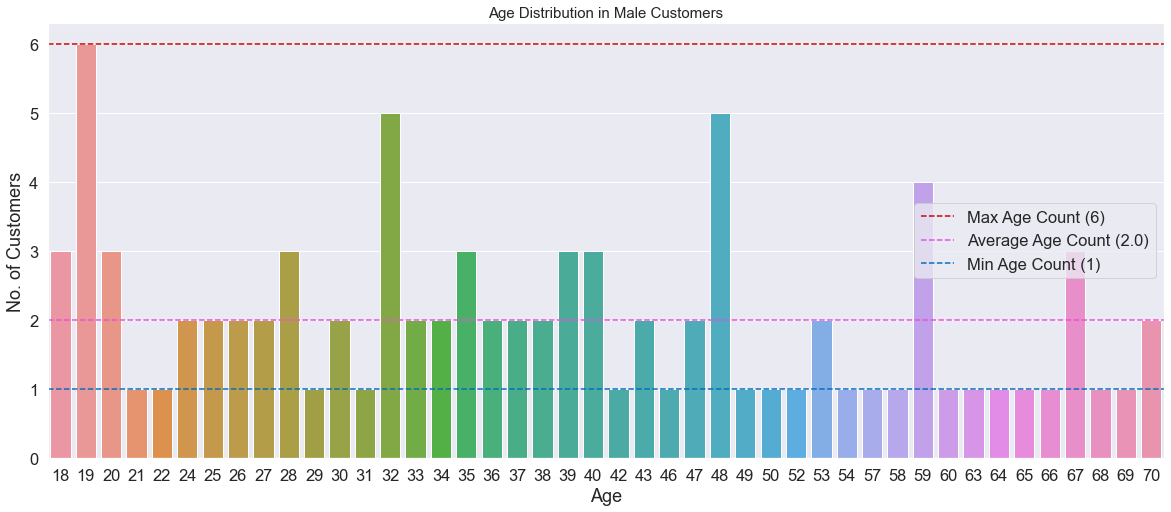

In [38]:
#Visualizing male distribution of age

maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age)

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Distribution in Male Customers', fontsize = 15)
plt.show()

In [39]:
# Average Age of Female Customers
data[data['Gender']=='Female'].Age.mean()

38.098214285714285

In [40]:
# Counts of first five max age in the Female Customers
data[data['Gender']=='Female'].Age.value_counts().head()

31    7
35    6
32    6
23    6
49    6
Name: Age, dtype: int64

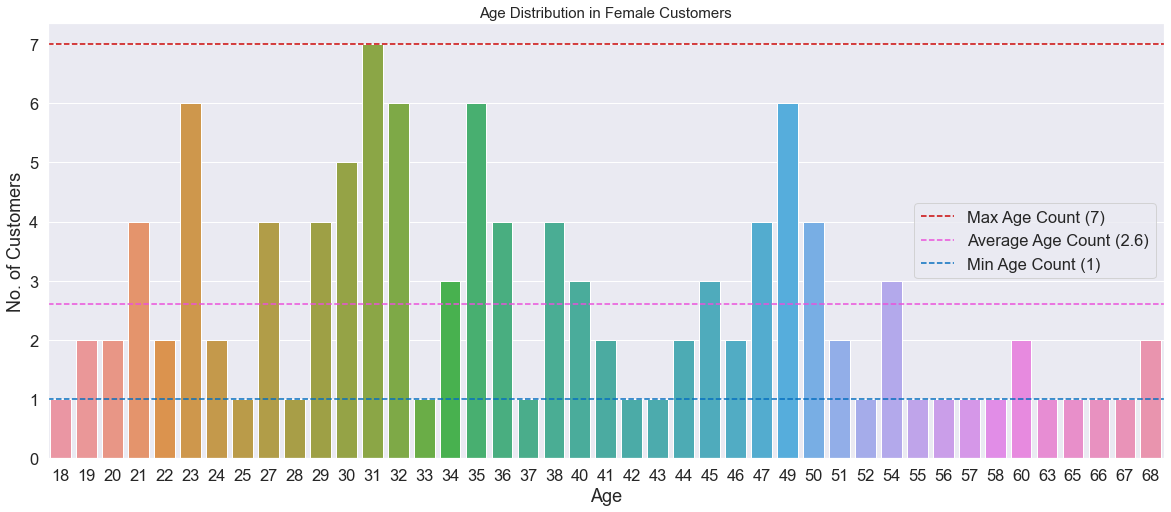

In [41]:
#Visualizing female distribution of age

maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age)
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 15)
plt.show()

#### Annual Income

In [42]:
#First we look at the Annual Income column
data['Annual_Income'].head()

0    15000
1    15000
2    16000
3    16000
4    17000
Name: Annual_Income, dtype: int64

In [43]:
# Data type of Annual Income Column
data['Annual_Income'].dtype

dtype('int64')

In [44]:
# Statistical data about Annual Income column
data['Annual_Income'].describe()

count       200.000000
mean      60560.000000
std       26264.721165
min       15000.000000
25%       41500.000000
50%       61500.000000
75%       78000.000000
max      137000.000000
Name: Annual_Income, dtype: float64

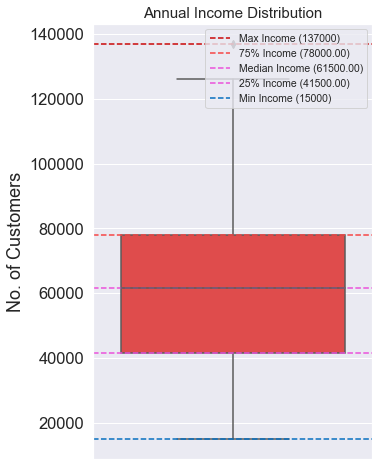

In [45]:
# Visualizing statistical data about Annual Income column
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income Distribution', fontsize = 15)
plt.show()

In [46]:
# Distribution of Annual Income
data['Annual_Income'].value_counts().head()

54000    12
78000    12
60000     6
87000     6
62000     6
Name: Annual_Income, dtype: int64

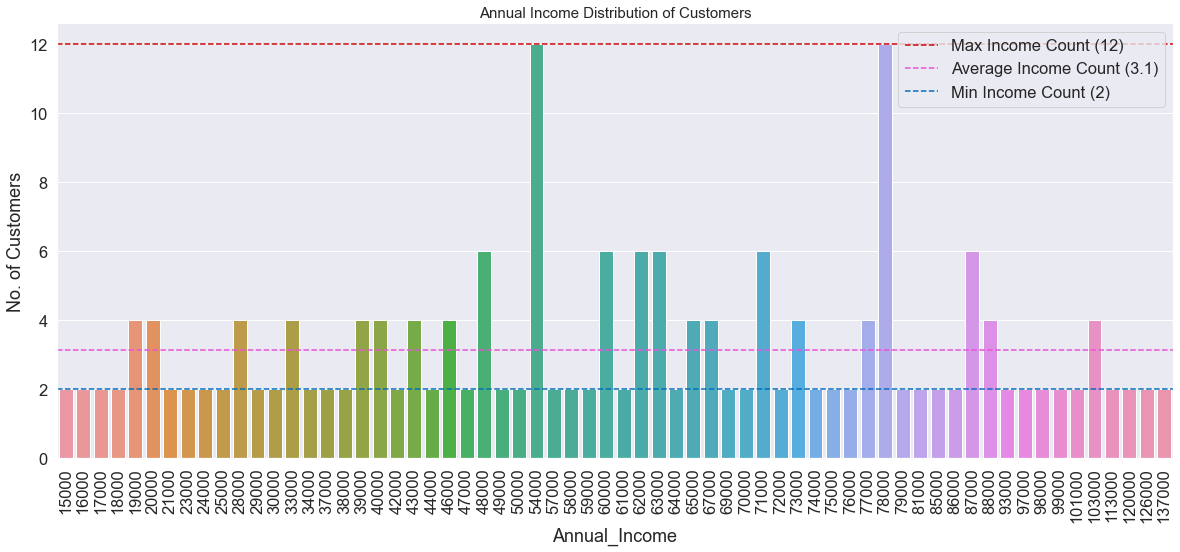

In [48]:
# Visualize Distribution of Annual Income

fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
sns.countplot(x=data['Annual_Income'])
ax.axhline(y=data['Annual_Income'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Income Count ({data.Annual_Income.value_counts().max()})')
ax.axhline(y=data['Annual_Income'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Income Count ({data.Annual_Income.value_counts().mean():.1f})')
ax.axhline(y=data['Annual_Income'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Income Count ({data.Annual_Income.value_counts().min()})')
plt.xticks(rotation=90)
ax.set_ylabel('No. of Customers')
ax.legend(loc ='upper right')

plt.title('Annual Income Distribution of Customers', fontsize = 15)
plt.show()

In [49]:
# Annual Income per Gender

# Annual Income of male customer
data[data['Gender']=='Male'].Annual_Income.describe()

count        88.000000
mean      62227.272727
std       26638.373182
min       15000.000000
25%       45500.000000
50%       62500.000000
75%       78000.000000
max      137000.000000
Name: Annual_Income, dtype: float64

In [50]:
# Annual Income of male customer
data[data['Gender']=='Female'].Annual_Income.describe()

count       112.000000
mean      59250.000000
std       26011.951515
min       16000.000000
25%       39750.000000
50%       60000.000000
75%       77250.000000
max      126000.000000
Name: Annual_Income, dtype: float64

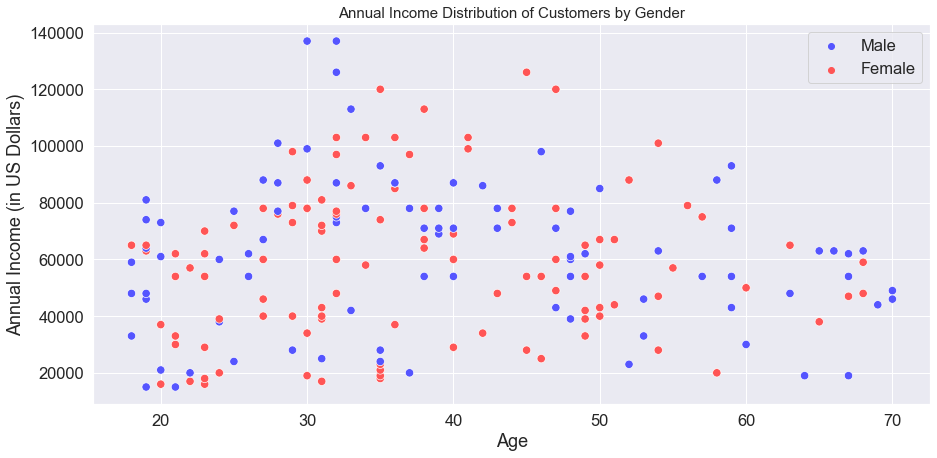

In [91]:
# Visualizing annual Income per Gender
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70)
ax.set_ylabel('Annual Income (in US Dollars)')
ax.legend(loc ='upper right')

plt.title('Annual Income Distribution of Customers by Gender', fontsize = 15)
plt.show()

#### Spending Score

In [55]:
# First we look at the Spending Score column
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

In [56]:
# Data type of Spending scores Column
data['Spending_Score'].dtype

dtype('int64')

In [57]:
# Statistical Data of Spending Scores Column
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

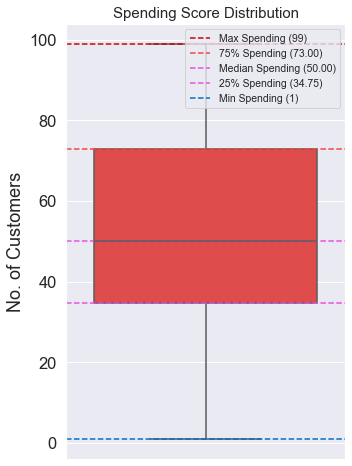

In [60]:
# Visualizing statistical data about Annual Income column
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Spending Score Distribution', fontsize = 15)
plt.show()

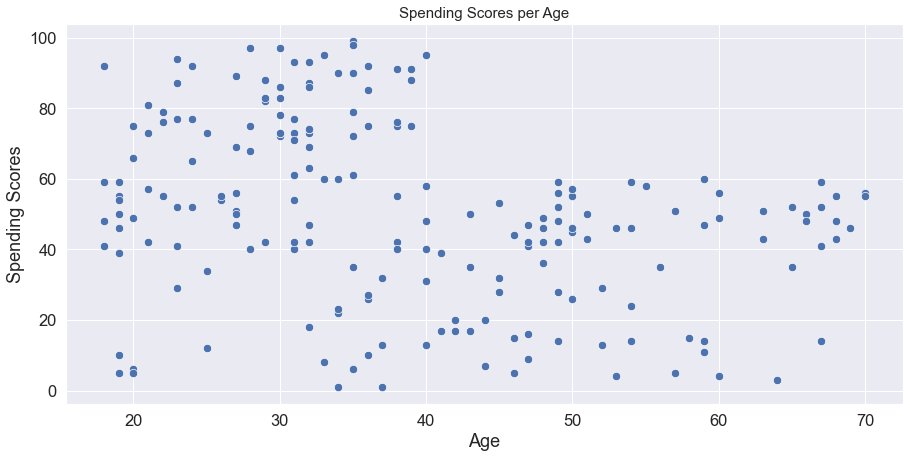

In [89]:
# Spending Scores per Age
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 15)
plt.show()

In [76]:
# Spending Scores per Gender

# Spending Scores of male customer
data[data['Gender']=='Male'].Annual_Income.describe()

count        88.000000
mean      62227.272727
std       26638.373182
min       15000.000000
25%       45500.000000
50%       62500.000000
75%       78000.000000
max      137000.000000
Name: Annual_Income, dtype: float64

In [77]:
# Spending Scores of male customer
data[data['Gender']=='Female'].Annual_Income.describe()

count       112.000000
mean      59250.000000
std       26011.951515
min       16000.000000
25%       39750.000000
50%       60000.000000
75%       77250.000000
max      126000.000000
Name: Annual_Income, dtype: float64

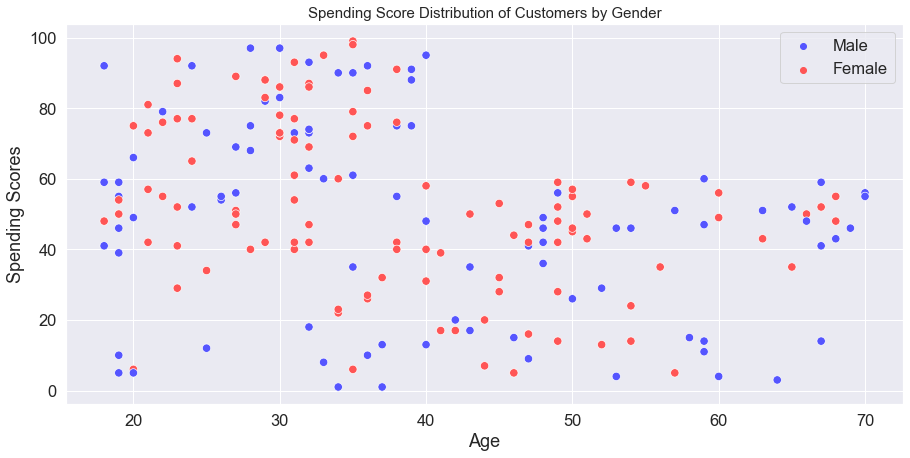

In [93]:
# Visualizing annual Income per Gender
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score Distribution of Customers by Gender', fontsize = 15)
plt.show()